In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import *
from keras import regularizers
from keras import backend as K
import matplotlib.pyplot as plt

num_classes = 100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

Using TensorFlow backend.
/home/hpdbman/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hpdbman/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hpdbman/.conda/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hpdbman/.conda/envs/py36/l

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


In [4]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=(32, 32, 3), padding='same', activation='relu',
                 kernel_initializer='uniform'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 2), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
adam = Adam(lr=1e-5) #1e-5收敛慢
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [5]:
datagen = ImageDataGenerator()

datagen.fit(x_train)

batch_size = 128
epochs = 300

train_history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                )

Epoch 1/300
391/391 [==============================] - 37s 95ms/step - loss: 4.5655 - accuracy: 0.0134 - val_loss: 4.4068 - val_accuracy: 0.0253
Epoch 2/300
391/391 [==============================] - 37s 93ms/step - loss: 4.3239 - accuracy: 0.0308 - val_loss: 4.2046 - val_accuracy: 0.0455
Epoch 3/300
391/391 [==============================] - 37s 94ms/step - loss: 4.1798 - accuracy: 0.0468 - val_loss: 4.0683 - val_accuracy: 0.0680
Epoch 4/300
391/391 [==============================] - 37s 94ms/step - loss: 4.0710 - accuracy: 0.0629 - val_loss: 3.9805 - val_accuracy: 0.0851
Epoch 5/300
391/391 [==============================] - 37s 94ms/step - loss: 3.9895 - accuracy: 0.0773 - val_loss: 3.8910 - val_accuracy: 0.1003
Epoch 6/300
391/391 [==============================] - 37s 94ms/step - loss: 3.9048 - accuracy: 0.0912 - val_loss: 3.7753 - val_accuracy: 0.1208
Epoch 7/300
391/391 [==============================] - 37s 94ms/step - loss: 3.8215 - accuracy: 0.1066 - val_loss: 3.7085 - val_ac

train 0.8530067
valid 0.39386200040578845


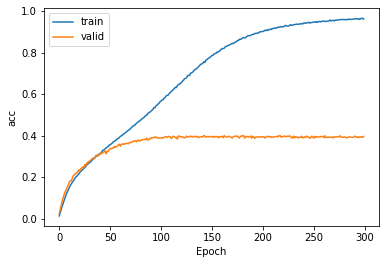

In [8]:
import util
# util.save_record(train_history.history, 'VGG.txt')
util.show_acc('VGG.txt', 100)